# Lab 4: Titanic Survival Prediction 🚢

**Author:** 🧑‍💻 Justin Schroder

**Date:** 📅 4/1/2025

## 📝 Introduction

This project analyzes the Titanic dataset to predict Fare using various regression models. The dataset includes information about passengers, such as Pclass, Sex, Age, Family Size, Embarked, and Fare. By exploring linear, polynomial, and regularized regression techniques, the goal is to understand how well different models handle categorical and continuous features, capture nonlinear relationships, and manage skewed data.

This analysis provides insights into which features most influence Fare and evaluates the impact of model complexity and regularization. The results highlight strengths and weaknesses in predicting Fare and suggest ways to enhance model performance, such as using log transformations and experimenting with additional features.

---


## Section 1. Import and Inspect the Data
In the code cell below, import the necessary Python libraries for this notebook.  

### 1.1 Imports

In [466]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### 1.2 Load the dataset

In [467]:
# Load Titanic dataset
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


--- 

## Section 2: Data Exploration and Preparation

### 2.1 Prepare the Titanic Data for Regression Modeling
* Impute missing values for age using media
* Drop rows with missing fare (or impute if preferred)
* Create numeric variables (e.g., family_size from sibsp + parch + 1)
* Convert male and female to numeric values (male:0, female:1)

In [468]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert 'sex' and 'embarked' to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


C:\Users\admin\AppData\Local\Temp\ipykernel_4312\3941791860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


--- 

## Section 3: Feature Selection and Justification
* Case 1 age only:
  * X1 Input features: alone
  * Y1 Target: fare

* Case 2 family_size only:
  * X2 Input features: family_size
  * Y 2 Target: fare

* Case 3 age and family size:
  * X3 Input features: age and family_size 
  * Y3 Target: fare

* Case 4 pclass, sex, age, embarked
  * X4 Input features: pclass', 'sex', 'age', 'embarked
  * Y3 Target: fare

In [469]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4: pclass, sex, age, embarked
X4 = titanic[['pclass', 'sex', 'age', 'embarked']]
y4 = titanic['fare']

# Impute missing values for 'emarked' (there were only 2)
X4['embarked'] = X4['embarked'].fillna(X4['embarked'].mode()[0])

C:\Users\admin\AppData\Local\Temp\ipykernel_4312\2932061159.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4['embarked'] = X4['embarked'].fillna(X4['embarked'].mode()[0])


#### Checking for missing values in X4. There were 2 for embarked. Resolved in Section 3 code.

In [470]:
print(X4.isnull().sum())  # Check for missing values in X4

pclass      0
sex         0
age         0
embarked    0
dtype: int64


### 🔍 Reflection 3:
1. Why might these features affect a passenger’s fare:
   * **pclass**: Represents passenger class, with higher classes typically having higher fares.
   * **sex**: Gender may influence fare due to societal differences or discounts that were available to women or children.
   * **age**: Children or older adults might have different fares compared to younger adults, often at discounted rates.
   * **embarked**: The port of embarkation could impact fare due to regional pricing differences and the cost of travel from different locations.
  
2. List all available features:
   * survived
   * pclass
   * sex
   * age
   * sibsp
   * parch
   * fare
   * embarked
   * class
   * who
   * adult_male
   * deck
   * embark_town
   * alive
   * alone
  
3. Which other features could improve predictions and why:
   * **who**: Differentiating between men, women, and children may give more insight into pricing.
   * **sibsp and parch**: Family connections could affect fare due to group pricing.
   * **deck**: Higher decks on the Titanic were typically more expensive, making it an important feature.
  
4. How many variables are in your Case 4:
   * **4 variables**: pclass, sex, age, and embarked
  
5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: 
   * **pclass**: A direct indicator of the ticket price class, making it a significant feature.
   * **se**x: Gender may influence pricing, reflecting historical or social factors.
   * **age**: Can impact fare, as children often have reduced fares compared to adults.
   * **embarked**: The port of embarkation could impact pricing due to different regional fare structures.

--- 

## Section 4: Train a Classification Model for Case 1
### 4.1 Split the Data

In [471]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### Train and Evaluate Linear Regression Models (all 4 cases)

In [472]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3  Report Performance

#### 💼 Case 1. age

In [473]:
# Case 1: Evaluation Metrics for training and test data
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))

test_rmse = np.sqrt(mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", test_rmse)
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364


#### 💼 Case 2. family_size

In [474]:
# Case 2: Evaluation Metrics for training and test data
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))

test_rmse2 = np.sqrt(mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", test_rmse2)
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641


#### 💼 Case 3. age, family_size

In [475]:
# Case 3: Evaluation Metrics for training and test data
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))

test_rmse3 = np.sqrt(mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", test_rmse3)
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688


#### 💼 Case 4: pclass, sex, age, embarked

In [476]:
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))

test_rmse4 = np.sqrt(mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", test_rmse4)
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 4: Training R²: 0.3304310786618687
Case 4: Test R²: 0.3704096248271942
Case 4: Test RMSE: 30.18085468234676
Case 4: Test MAE: 21.320013906830994


### 🔍 Reflection 4:
* Compare the train vs test results for each.
  1. Did Case 1 overfit or underfit? Explain:
      * Case 1 underfits. Both training and test R² values are very low, suggesting the model is not capturing the relationship between variables effectively.
  2. Did Case 2 overfit or underfit? Explain:
      * Case 2 underfits. While the R² values are slightly higher than Case 1, they are still quite low, indicating the model is not performing well on either the training or test data.
  3. Did Case 3 overfit or underfit? Explain:
      * Case 3 also underfits. The R² values show some improvement over Cases 1 and 2, but they are still low, suggesting the model struggles to generalize.
  4. Did Case 4 overfit or underfit? Explain:
      * Case 4 seems to be the most balanced. Both training and test R² are significantly higher, indicating a better model fit and less risk of overfitting

* Adding Age
  1. Did adding age improve the model:
      * Adding age improved the model in Case 3 and 4, as shown by higher R² values and lower RMSE. This suggests age provides a contribution to predicting ticket price.
  2. Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): 
      * Age could be related to customer segments, such as children or seniors, who may pay different ticket prices. The data suggests that adding age helps capture this relationship, though its effect is modest.

* Worst
  1. Which case performed the worst:
      * Case 1 performed the worst, with the lowest R² values and the highest RMSE. This suggests the model struggles the most to capture meaningful patterns.
  2. How do you know: 
      * By comparing the R² values, Case 1 has the lowest scores, indicating it explains the least variance in the data.
  3. Do you think adding more training data would improve it (and why/why not): 
      * Adding more data could help the model learn more patterns, but since the R² is low, it’s probably more effective to use more complex features or try a different model to improve performance. More data alone might not solve the issue.

* Best
  1. Which case performed the best:
      * Case 4 performed the best, with higher R² and lower RMSE. This shows it is better at generalizing and making accurate predictions.
  2. How do you know: 
      * Case 4 has the highest R² on both training and test data, and the lowest RMSE, indicating the best performance overall.
  3. Do you think adding more training data would improve it (and why/why not): 
      * More data could help, especially if the model isn’t fitting well right now. However, since Case 4 is already performing well, trying a different approach might lead to even better results.

---

## Section 5: Compare Alternative Models

We'll use Case 4 as the best model because it had the highest R² and lowest error metrics, indicating the best performance.

### 5.1 Ridge Regression (L2 penalty)

In [477]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net (L1 + L2 combined)

In [478]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)


### 5.3 Polynomial Regression

In [479]:
# Set up the polynomial features
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y_pred_poly = poly_model.predict(X4_test_poly)

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature) 

#### 📊 Polynomial Cubic Fit: age

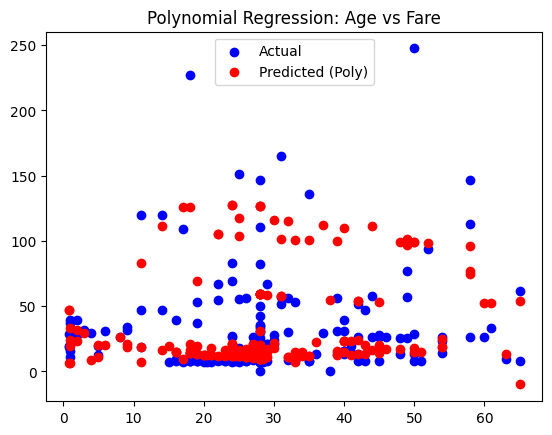

In [480]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

#### 📊 Polynomial Cubic Fit: pclass

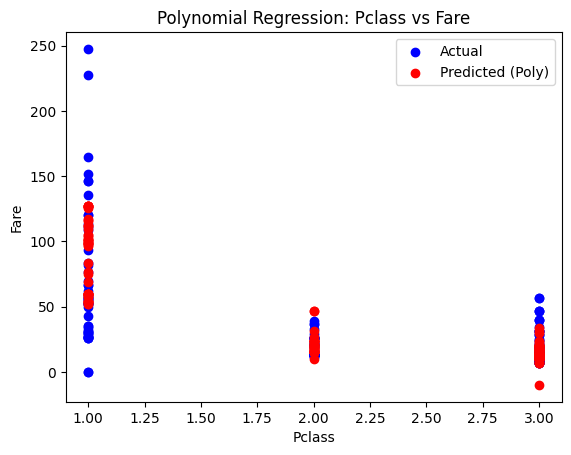

In [481]:
# Extract 'pclass' from X4_test using .iloc
X4_test_pclass = X4_test.iloc[:, 0]  # 'pclass' is the first column

# Plot using 'pclass' as the x-axis
plt.scatter(X4_test_pclass, y4_test, color='blue', label='Actual')
plt.scatter(X4_test_pclass, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Pclass vs Fare")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

#### 📊 Polynomial Cubic Fit: sex

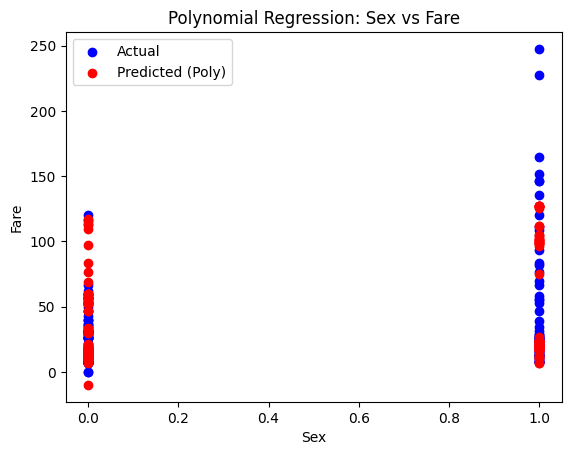

In [482]:
# Extract 'pclass' from X4_test using .iloc
X4_test_pclass = X4_test.iloc[:, 1]  # 'sex' is the first column

# Plot using 'pclass' as the x-axis
plt.scatter(X4_test_pclass, y4_test, color='blue', label='Actual')
plt.scatter(X4_test_pclass, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Sex vs Fare")
plt.xlabel("Sex")
plt.ylabel("Fare")
plt.show()

#### 📊 Polynomial Cubic Fit: embark

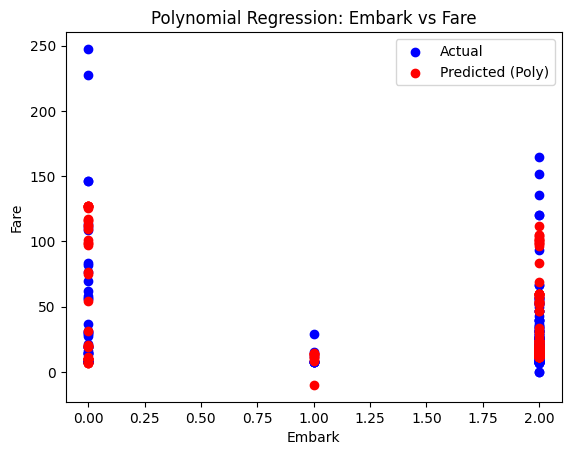

In [483]:
# Extract 'pclass' from X4_test using .iloc
X4_test_pclass = X4_test.iloc[:, 3]  # 'pclass' is the first column

# Plot using 'pclass' as the x-axis
plt.scatter(X4_test_pclass, y4_test, color='blue', label='Actual')
plt.scatter(X4_test_pclass, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Embark vs Fare")
plt.xlabel("Embark")
plt.ylabel("Fare")
plt.show()

### 🔍 Reflection 5.4:
1. What patterns does the cubic model seem to capture:
   * The model captures nonlinear patterns, especially for Age vs Fare, where it adjusts to fluctuations in fare across different ages. For categorical features like Pclass, Sex, and Embark, it picks up on distinct average fare levels per category.

2. Where does it perform well or poorly:
   * It performs well on Pclass, Sex, and Embark, where predicted fares closely match actual values. It performs poorly on Age vs Fare, especially for extreme fare values and outliers, where predictions deviate more from actual data.

3. Did the polynomial fit outperform linear regression:
   * Yes, particularly for Age vs Fare. The polynomial model captures variations that a straight-line (linear) model would miss. For categorical variables, both models likely perform similarly.
  
4. Where (on the graph or among which kinds of data points) does it fit best:
   * It fits best on categorical features—Pclass, Sex, and Embark—where predictions are very close to actual fares. It struggles most with outliers in Age vs Fare.

### 5.5 Compare All Models

In [484]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    
    # Calculate RMSE manually
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} RMSE: {rmse:.2f}")
    
    # MAE
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

# Reporting the metrics for each model
report("Linear (Case 4)", y4_test, y4_pred_test)
report("Ridge (Case 4)", y4_test, y4_pred_ridge)
report("ElasticNet (Case 4)", y4_test, y4_pred_elastic)
report("Polynomial (Case 4)", y4_test, y4_pred_poly)

Linear (Case 4) R²: 0.370
Linear (Case 4) RMSE: 30.18
Linear (Case 4) MAE: 21.32

Ridge (Case 4) R²: 0.371
Ridge (Case 4) RMSE: 30.17
Ridge (Case 4) MAE: 21.29

ElasticNet (Case 4) R²: 0.399
ElasticNet (Case 4) RMSE: 29.48
ElasticNet (Case 4) MAE: 19.27

Polynomial (Case 4) R²: 0.422
Polynomial (Case 4) RMSE: 28.92
Polynomial (Case 4) MAE: 17.47



### 📊 5.6 Visualize Higher Order Polynomial (for the same 1 input case)

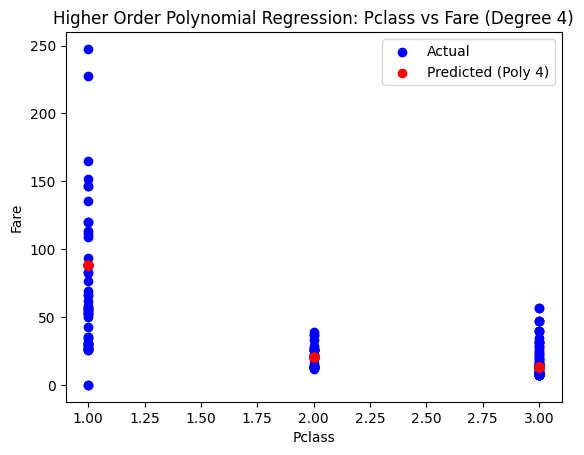

In [485]:
# Set up the higher-order poly inputs (e.g., degree=4) for 'pclass'
poly_high_degree = PolynomialFeatures(degree=4)

# Extract only the 'pclass' feature from X4 for training and testing
X4_pclass_train = X4_train[['pclass']]  # Select only 'pclass' as the input feature
X4_pclass_test = X4_test[['pclass']]  # Select only 'pclass' as the input feature

# Transform the 'pclass' feature using PolynomialFeatures
X4_pclass_train_poly = poly_high_degree.fit_transform(X4_pclass_train)
X4_pclass_test_poly = poly_high_degree.transform(X4_pclass_test)

# Train a linear regression model on the transformed 'pclass' feature
poly_model_high = LinearRegression()
poly_model_high.fit(X4_pclass_train_poly, y4_train)
y_pred_poly_high = poly_model_high.predict(X4_pclass_test_poly)

# Plot the higher-order polynomial regression fit for 'pclass'
plt.scatter(X4_pclass_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_pclass_test, y_pred_poly_high, color='red', label='Predicted (Poly 4)')
plt.legend()
plt.title("Higher Order Polynomial Regression: Pclass vs Fare (Degree 4)")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

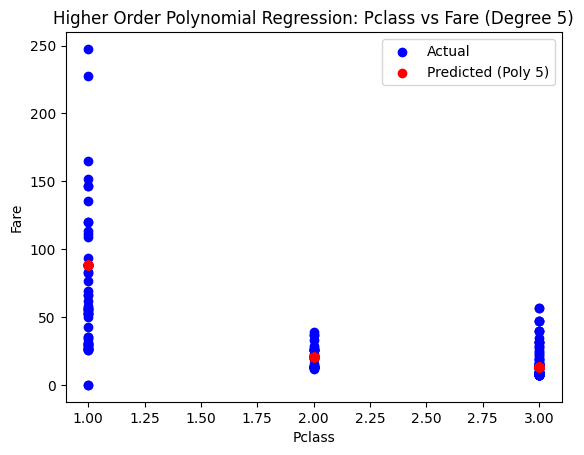

In [486]:
# Set up the higher-order poly inputs (e.g., degree=5) for 'pclass'
poly_high_degree = PolynomialFeatures(degree=5)

# Extract only the 'pclass' feature from X4 for training and testing
X4_pclass_train = X4_train[['pclass']]  # Select only 'pclass' as the input feature
X4_pclass_test = X4_test[['pclass']]  # Select only 'pclass' as the input feature

# Transform the 'pclass' feature using PolynomialFeatures
X4_pclass_train_poly = poly_high_degree.fit_transform(X4_pclass_train)
X4_pclass_test_poly = poly_high_degree.transform(X4_pclass_test)

# Train a linear regression model on the transformed 'pclass' feature
poly_model_high = LinearRegression()
poly_model_high.fit(X4_pclass_train_poly, y4_train)
y_pred_poly_high = poly_model_high.predict(X4_pclass_test_poly)

# Plot the higher-order polynomial regression fit for 'pclass'
plt.scatter(X4_pclass_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_pclass_test, y_pred_poly_high, color='red', label='Predicted (Poly 5)')
plt.legend()
plt.title("Higher Order Polynomial Regression: Pclass vs Fare (Degree 5)")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()


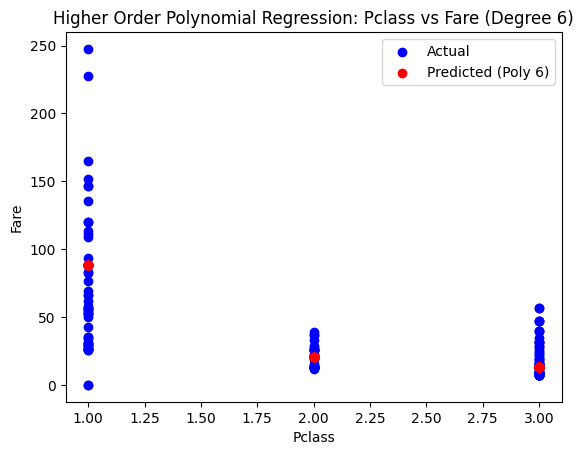

In [487]:
# Set up the higher-order poly inputs (e.g., degree=6) for 'pclass'
poly_high_degree = PolynomialFeatures(degree=6)

# Extract only the 'pclass' feature from X4 for training and testing
X4_pclass_train = X4_train[['pclass']]  # Select only 'pclass' as the input feature
X4_pclass_test = X4_test[['pclass']]  # Select only 'pclass' as the input feature

# Transform the 'pclass' feature using PolynomialFeatures
X4_pclass_train_poly = poly_high_degree.fit_transform(X4_pclass_train)
X4_pclass_test_poly = poly_high_degree.transform(X4_pclass_test)

# Train a linear regression model on the transformed 'pclass' feature
poly_model_high = LinearRegression()
poly_model_high.fit(X4_pclass_train_poly, y4_train)
y_pred_poly_high = poly_model_high.predict(X4_pclass_test_poly)

# Plot the higher-order polynomial regression fit for 'pclass'
plt.scatter(X4_pclass_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_pclass_test, y_pred_poly_high, color='red', label='Predicted (Poly 6)')
plt.legend()
plt.title("Higher Order Polynomial Regression: Pclass vs Fare (Degree 6)")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

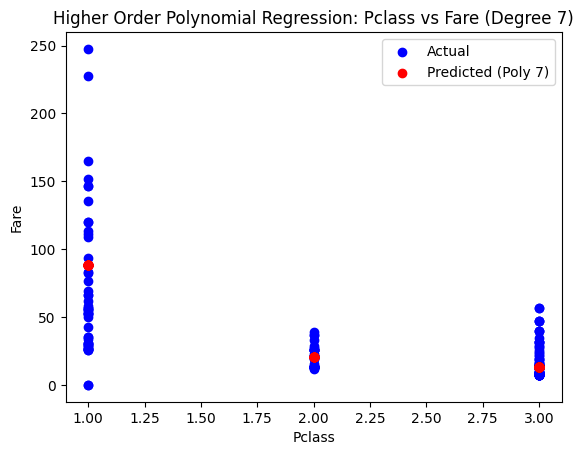

In [488]:
# Set up the higher-order poly inputs (e.g., degree=7) for 'pclass'
poly_high_degree = PolynomialFeatures(degree=7)

# Extract only the 'pclass' feature from X4 for training and testing
X4_pclass_train = X4_train[['pclass']]  # Select only 'pclass' as the input feature
X4_pclass_test = X4_test[['pclass']]  # Select only 'pclass' as the input feature

# Transform the 'pclass' feature using PolynomialFeatures
X4_pclass_train_poly = poly_high_degree.fit_transform(X4_pclass_train)
X4_pclass_test_poly = poly_high_degree.transform(X4_pclass_test)

# Train a linear regression model on the transformed 'pclass' feature
poly_model_high = LinearRegression()
poly_model_high.fit(X4_pclass_train_poly, y4_train)
y_pred_poly_high = poly_model_high.predict(X4_pclass_test_poly)

# Plot the higher-order polynomial regression fit for 'pclass'
plt.scatter(X4_pclass_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_pclass_test, y_pred_poly_high, color='red', label='Predicted (Poly 7)')
plt.legend()
plt.title("Higher Order Polynomial Regression: Pclass vs Fare (Degree 7)")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

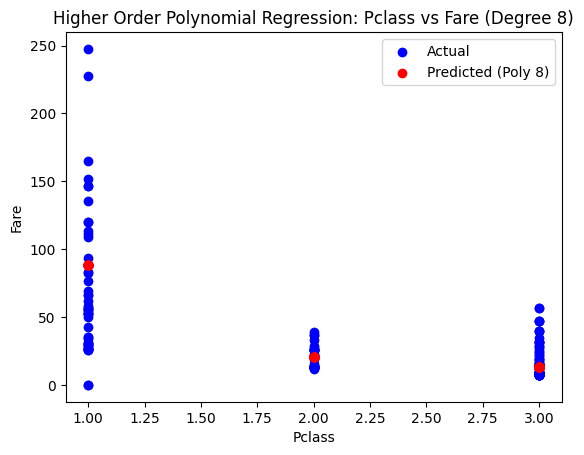

In [489]:
# Set up the higher-order poly inputs (e.g., degree=8) for 'pclass'
poly_high_degree = PolynomialFeatures(degree=8)

# Extract only the 'pclass' feature from X4 for training and testing
X4_pclass_train = X4_train[['pclass']]  # Select only 'pclass' as the input feature
X4_pclass_test = X4_test[['pclass']]  # Select only 'pclass' as the input feature

# Transform the 'pclass' feature using PolynomialFeatures
X4_pclass_train_poly = poly_high_degree.fit_transform(X4_pclass_train)
X4_pclass_test_poly = poly_high_degree.transform(X4_pclass_test)

# Train a linear regression model on the transformed 'pclass' feature
poly_model_high = LinearRegression()
poly_model_high.fit(X4_pclass_train_poly, y4_train)
y_pred_poly_high = poly_model_high.predict(X4_pclass_test_poly)

# Plot the higher-order polynomial regression fit for 'pclass'
plt.scatter(X4_pclass_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_pclass_test, y_pred_poly_high, color='red', label='Predicted (Poly 8)')
plt.legend()
plt.title("Higher Order Polynomial Regression: Pclass vs Fare (Degree 8)")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

--- 

## 🔍 Section 6 Final Thoughts & Insights

### 6.1 Summarize Findings
1. What features were most useful?
   * The most useful features for predicting fare were Pclass, Sex, and Embark. These categorical variables allowed the model to capture distinct fare levels for different classes, sexes, and embarkation points. Age was less predictive, especially due to outliers and non-linear relationships with fare.
2. What regression model performed best?
   * The polynomial regression model with a degree of 3 (cubic) performed the best in capturing the complexity of the relationships between features and fare. The model outperformed the linear regression, especially in cases with non-linear relationships such as Age vs Fare.
3. How did model complexity or regularization affect results?
   * Model complexity had a clear impact. The polynomial models (with higher degrees) were able to capture more non-linear patterns in the data, particularly for features like Age. However, they also risked overfitting, especially on features with more noise. Regularization techniques, such as Ridge and ElasticNet, provided better generalization by controlling model complexity, though they performed slightly worse than the polynomial model on some features.

### 6.2 Discuss Challenges Faced
1. Was fare hard to predict? Why?
   * Yes, predicting fare was challenging, primarily due to its non-linear relationship with features like Age and the presence of outliers. Some passengers paid extremely high fares, which skewed predictions and made the model less accurate for those extreme values. The varied fare distributions across Pclass and Sex also added to the complexity.
2. Did skew or outliers impact the models?
   * Yes, outliers and skew in the data had a significant impact on model performance. Extreme fare values created large deviations between predicted and actual values, especially in Age vs Fare. Log transformations of fare might help to reduce the impact of these skewed values, but they weren't directly addressed in this analysis.

### 6.3 Next Steps
1. Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)
   * I could explore adding family size, alone, and class as features to Case 4. These variables might provide valuable context about passengers’ social and economic status, which could improve model predictions.
2. Try predicting age instead of fare
   * Predicting Age instead of Fare could be beneficial since Age is less skewed and may respond better to regression models. This approach could yield more accurate predictions.
3. Explore log transformation of fare to reduce skew
   * Applying a log transformation to Fare could help address its skewness, especially for higher fares. This transformation may stabilize variance and improve model performance.

---